In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sal = pd.read_csv('Salary.csv')

In [3]:
sal

,index,Nation,purchased_item,salary,age
0,0,India,No,66777.0,23.0
1,1,Russia,Yes,87878.0,24.0
2,2,Germany,No,34559.0,NaN
3,3,India,Yes,40000.0,26.0
4,4,Germany,Yes,NaN,21.0
5,5,Russia,No,45000.0,NaN
6,6,Germany,Yes,89993.0,62.0
7,7,India,No,55555.0,24.0
8,8,Russia,Yes,NaN,45.0
9,9,Germany,Yes,67222.0,53.0


In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           10 non-null     int64  
 1   Nation          10 non-null     object 
 2   purchased_item  10 non-null     object 
 3   salary          8 non-null      float64
 4   age             8 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 528.0+ bytes


In [5]:
sal.head

<bound method NDFrame.head of    index   Nation purchased_item   salary   age
0      0    India             No  66777.0  23.0
1      1   Russia            Yes  87878.0  24.0
2      2  Germany             No  34559.0   NaN
3      3    India            Yes  40000.0  26.0
4      4  Germany            Yes      NaN  21.0
5      5   Russia             No  45000.0   NaN
6      6  Germany            Yes  89993.0  62.0
7      7    India             No  55555.0  24.0
8      8   Russia            Yes      NaN  45.0
9      9  Germany            Yes  67222.0  53.0>

In [6]:
sal.isnull().sum()

index             0
Nation            0
purchased_item    0
salary            2
age               2
dtype: int64

In [7]:
salary = sal.dropna()

In [8]:
salary

,index,Nation,purchased_item,salary,age
0,0,India,No,66777.0,23.0
1,1,Russia,Yes,87878.0,24.0
3,3,India,Yes,40000.0,26.0
6,6,Germany,Yes,89993.0,62.0
7,7,India,No,55555.0,24.0
9,9,Germany,Yes,67222.0,53.0


In [9]:
salary.isnull().sum()

index             0
Nation            0
purchased_item    0
salary            0
age               0
dtype: int64

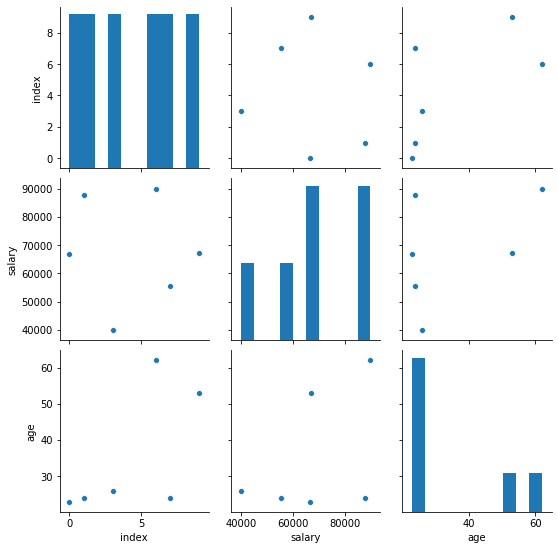

In [10]:
sns.pairplot(salary)

In [11]:
salary.skew()

index     0.029576
salary   -0.210258
age       1.069096
dtype: float64

In [12]:
salary.dtypes

index               int64
Nation             object
purchased_item     object
salary            float64
age               float64
dtype: object

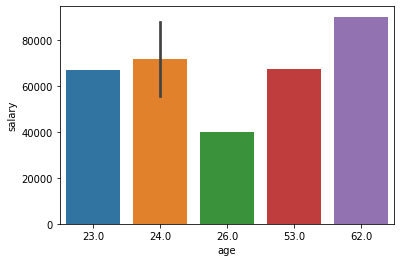

In [13]:
sns.barplot(x="age",y="salary",data=salary)
plt.show()

In [14]:
salary.corr()

,index,salary,age
index,1.000000,-0.070075,0.645819
salary,-0.070075,1.000000,0.460022
age,0.645819,0.460022,1.000000


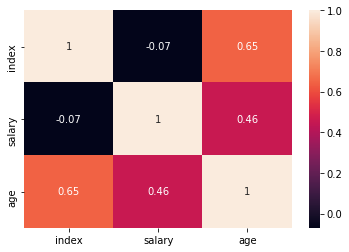

In [15]:
sns.heatmap(salary.corr(),annot=True)

In [16]:
from scipy.stats import boxcox
salary['age']=boxcox(salary['age'],0.5)

C:\Users\Dabral\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
salary.skew()

index     0.029576
salary   -0.210258
age       1.025765
dtype: float64

In [18]:
sa = salary.drop('Nation',axis=1)

In [19]:
sa

,index,purchased_item,salary,age
0,0,No,66777.0,7.591663
1,1,Yes,87878.0,7.797959
3,3,Yes,40000.0,8.198039
6,6,Yes,89993.0,13.748016
7,7,No,55555.0,7.797959
9,9,Yes,67222.0,12.560220


In [20]:
x = salary["age"]

In [21]:
x

0     7.591663
1     7.797959
3     8.198039
6    13.748016
7     7.797959
9    12.560220
Name: age, dtype: float64

In [22]:
y= salary['salary']

In [23]:
y

0    66777.0
1    87878.0
3    40000.0
6    89993.0
7    55555.0
9    67222.0
Name: salary, dtype: float64

In [24]:
from scipy.stats import zscore

In [25]:
sa

,index,purchased_item,salary,age
0,0,No,66777.0,7.591663
1,1,Yes,87878.0,7.797959
3,3,Yes,40000.0,8.198039
6,6,Yes,89993.0,13.748016
7,7,No,55555.0,7.797959
9,9,Yes,67222.0,12.560220


In [26]:
s= sa.drop('index',axis = 1)

In [27]:
s

,purchased_item,salary,age
0,No,66777.0,7.591663
1,Yes,87878.0,7.797959
3,Yes,40000.0,8.198039
6,Yes,89993.0,13.748016
7,No,55555.0,7.797959
9,Yes,67222.0,12.560220


In [28]:
salary1 = s.drop('purchased_item',axis=1)

In [29]:
salary1

,salary,age
0,66777.0,7.591663
1,87878.0,7.797959
3,40000.0,8.198039
6,89993.0,13.748016
7,55555.0,7.797959
9,67222.0,12.560220


In [30]:
z = np.abs(zscore(salary1))

In [31]:
z

array([[0.06472287, 0.7994126 ],
       [1.1469146 , 0.71793175],
       [1.60228112, 0.55991186],
       [1.2683597 , 1.63216628],
       [0.70909971, 0.71793175],
       [0.03917059, 1.16302168]])

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.23,random_state=2)
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)

ValueError: Expected 2D array, got 1D array instead:
array=[13.74801575  8.19803903 12.56021978  7.59166305].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [34]:
x.shape

(6,)

In [35]:
y.shape

(6,)

In [ ]:
y_pred